In [9]:
!pip install transformers

In [40]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.  Using cached dill-0.3.4-py2.py3-none-any.whl (86 kB)

  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.59.0
    Uninstalling tqdm-4.59.0:
      Successfully uninstalled tqdm-4.59.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.9.0
    Uninstalling fsspec-0.9.0:
      Successfully uninstalled fsspec-0.9.0


In [10]:
from transformers import HubertModel, HubertConfig

In [41]:
from datasets import load_dataset

In [42]:
import soundfile as sf

In [11]:
configuration = HubertConfig()

In [12]:
model = HubertModel(configuration)
configuration = model.config

In [13]:

from transformers import Wav2Vec2Processor, HubertModel

In [19]:
from transformers import pipeline

In [14]:
filename = "03-01-05-01-02-01-01.wav"

In [15]:
processor = Wav2Vec2Processor.from_pretrained("facebook/hubert-large-ls960-ft")

Downloading:   0%|          | 0.00/212 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/138 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

In [20]:
processor = Wav2Vec2Processor.from_pretrained("facebook/hubert-large-ls960-ft", model= "03-01-05-01-02-01-01.wav")


In [23]:
!pip install librosa

In [27]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [25]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 6455-17FE

 Directory of C:\Users\Hp

11/08/2021  02:43 PM    <DIR>          .
11/08/2021  02:43 PM    <DIR>          ..
11/06/2021  10:14 PM             1,749 .bash_history
11/08/2021  02:09 PM    <DIR>          .cache
11/08/2021  02:44 PM    <DIR>          .conda
09/18/2021  03:52 PM                25 .condarc
09/23/2021  02:07 AM    <DIR>          .config
09/18/2021  03:52 PM    <DIR>          .continuum
11/08/2021  02:05 PM    <DIR>          .ipynb_checkpoints
09/21/2021  02:24 AM    <DIR>          .ipython
09/23/2021  07:52 PM    <DIR>          .jupyter
09/21/2021  02:25 AM    <DIR>          .matplotlib
10/30/2021  12:33 PM    <DIR>          .VirtualBox
09/18/2021  09:21 PM    <DIR>          .vscode
11/07/2021  12:22 PM           437,952 03-01-05-01-01-02-01.wav
11/07/2021  12:22 PM           396,310 03-01-05-01-02-01-01.wav
11/07/2021  12:22 PM           418,732 03-01-05-01-02-02-01.wav
11/07/2021  12:21 PM           455,342 

(array([ 6.8139506e-08, -2.3837963e-05, -2.4622474e-05, ...,
         3.1678758e-06, -2.4535689e-06,  0.0000000e+00], dtype=float32),
 22050)

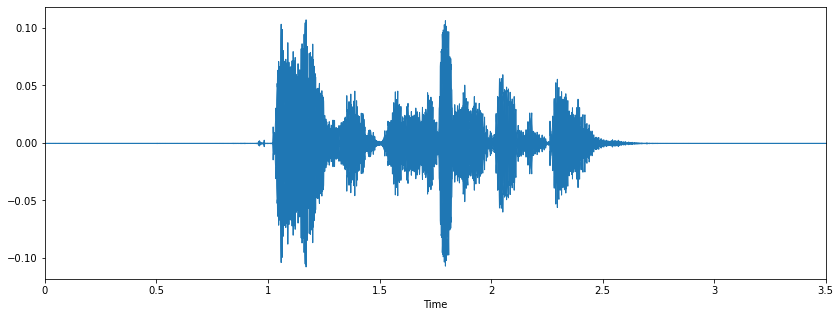

In [30]:
#Actor-1 sound 1
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr= sample_rate)
librosa.load(filename)

In [32]:
def map_to_array(batch):
    speech, _ = sf.read(batch["filename"])
    batch["speech"] = speech
    return batch

In [43]:
ds = load_dataset("hf-internal-testing/librispeech_asr_dummy", "clean", split="validation")

Downloading:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

Dataset librispeech_asr downloaded and prepared to C:\Users\Hp\.cache\huggingface\datasets\hf-internal-testing___librispeech_asr\clean\2.1.0\f2c70a4d03ab4410954901bde48c54b85ca1b7f9bf7d616e7e2a72b5ee6ddbfc. Subsequent calls will reuse this data.


In [50]:
values = processor(ds["speech"][0], return_tensors="pt").input_values

KeyError: "Column speech not in the dataset. Current columns in the dataset: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id']"